# SQL Data Analytics Projects 
---


## Timetable

### 1. Data Processing
### 2. RFM
### 3. Feature Extraction
### 4. Retrospective

사용 데이터 : E-Commerce Data / https://www.kaggle.com/datasets/carrie1/ecommerce-data

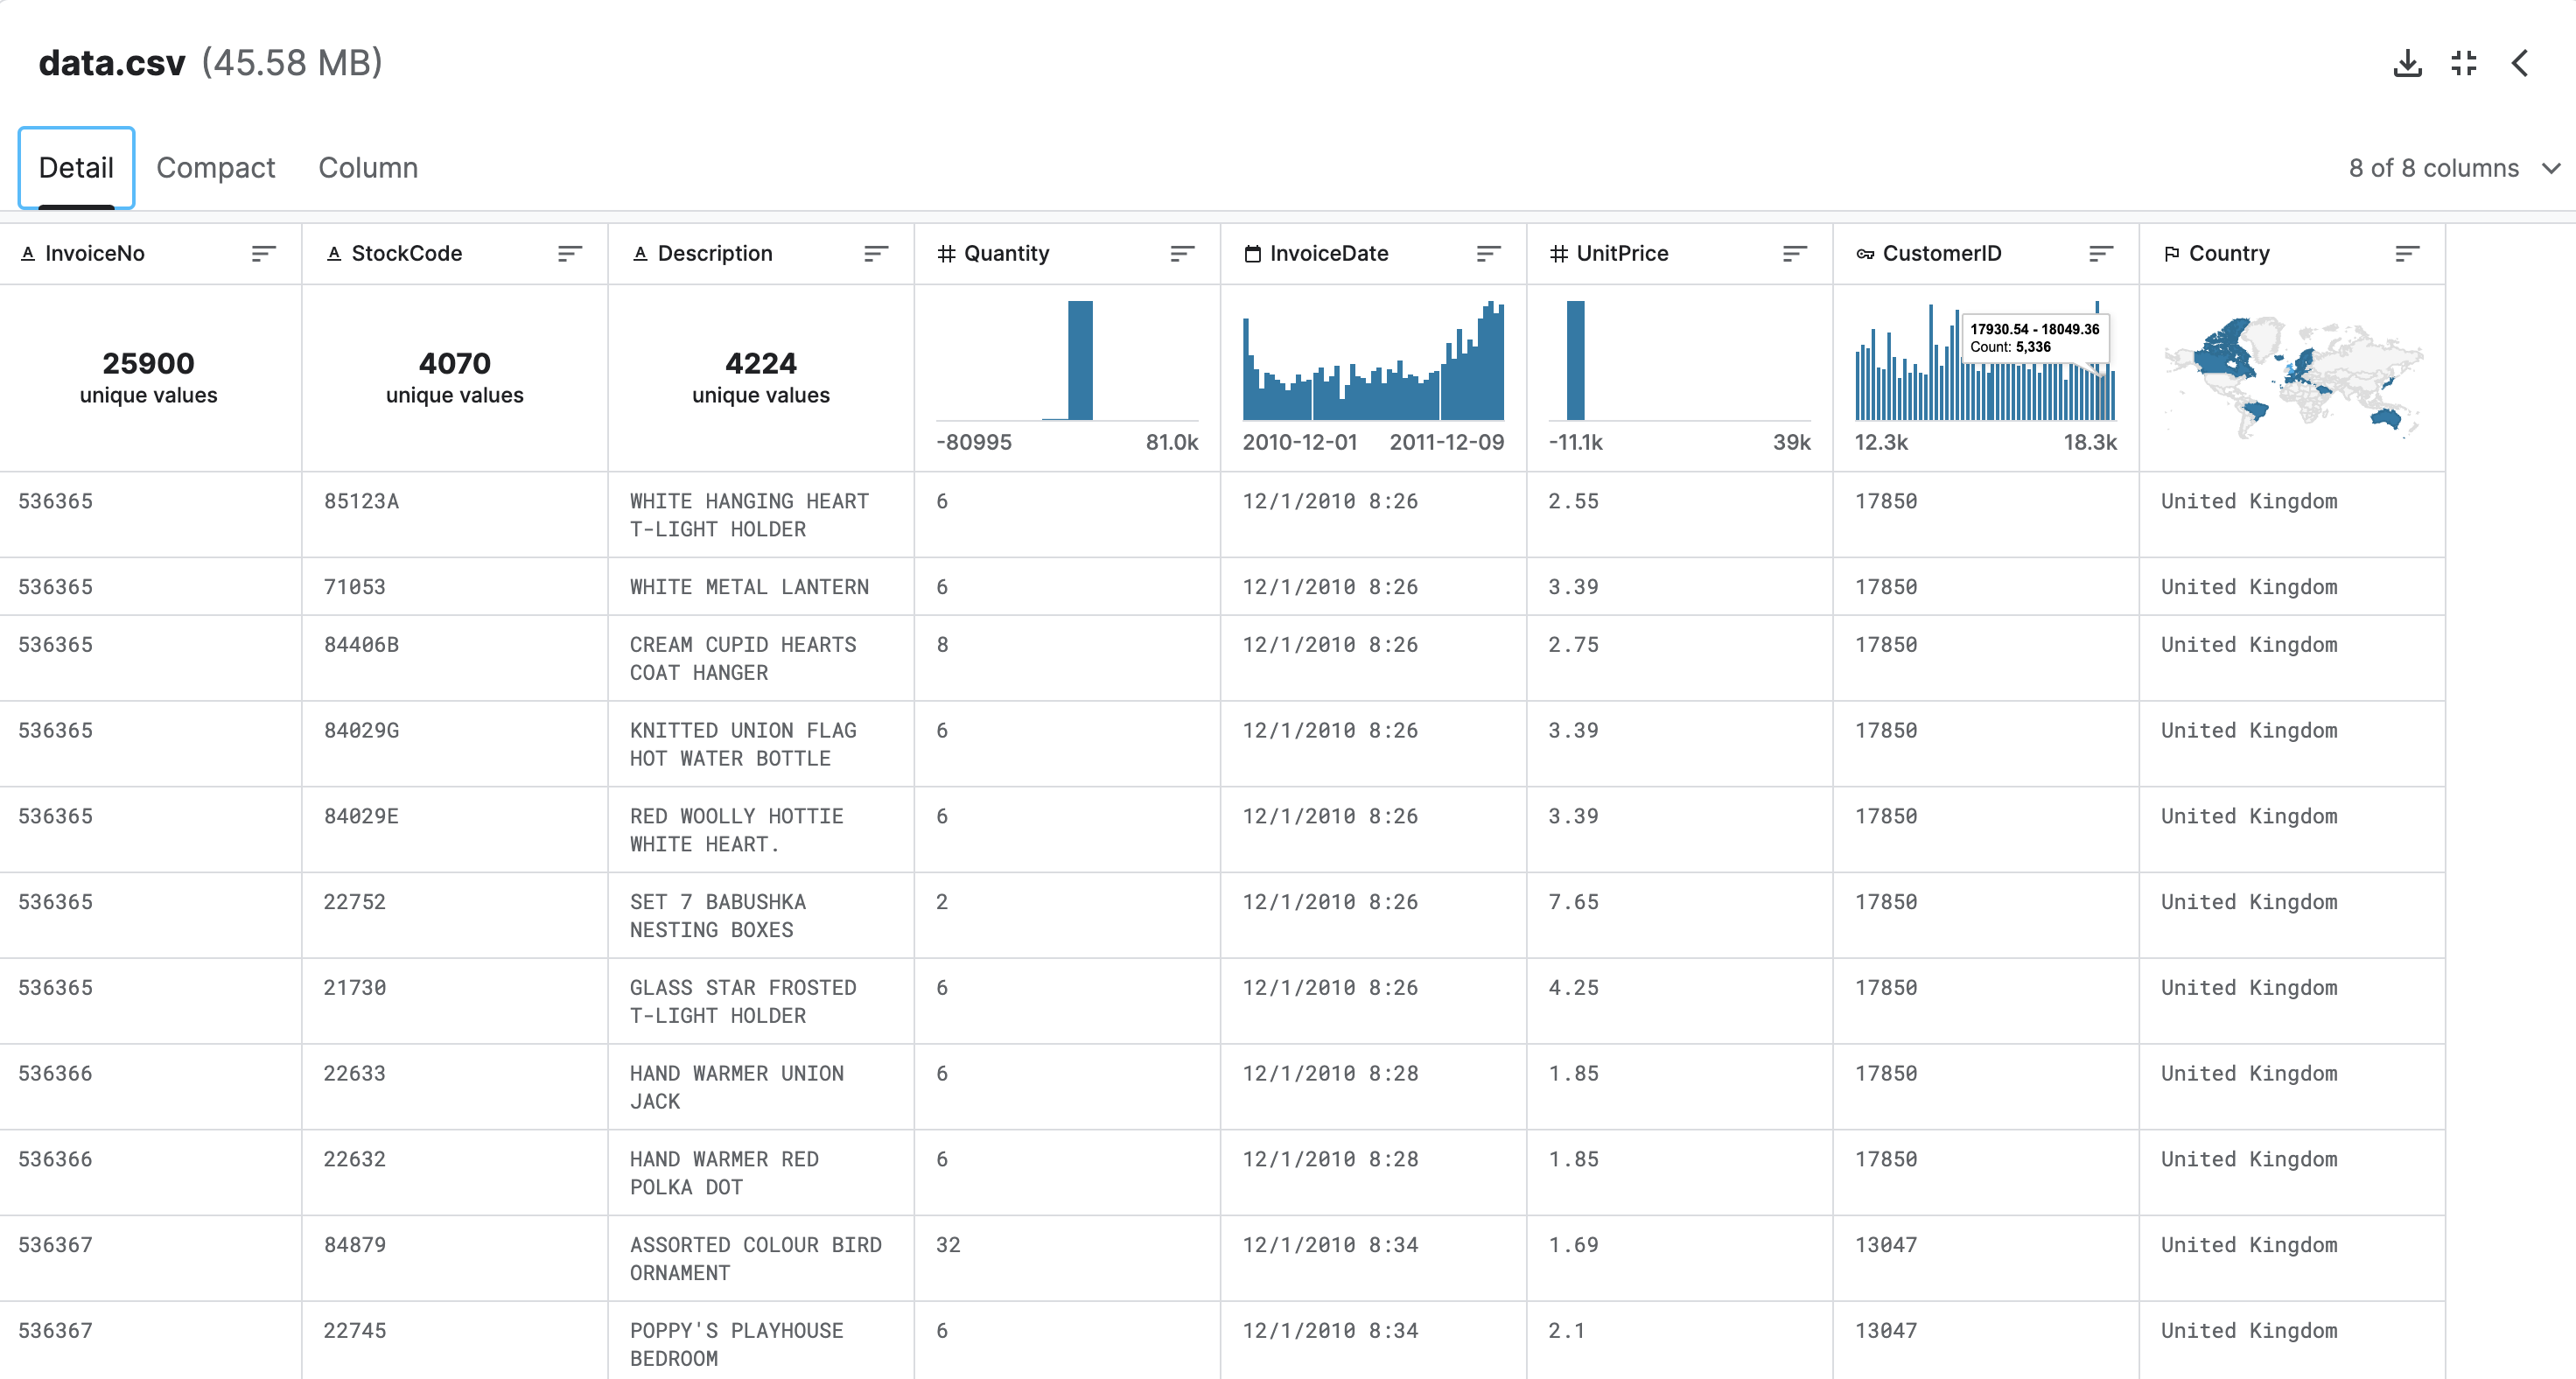

In [ ]:
select * 
from aiffel-411000.modulabs_project.data
limit 10

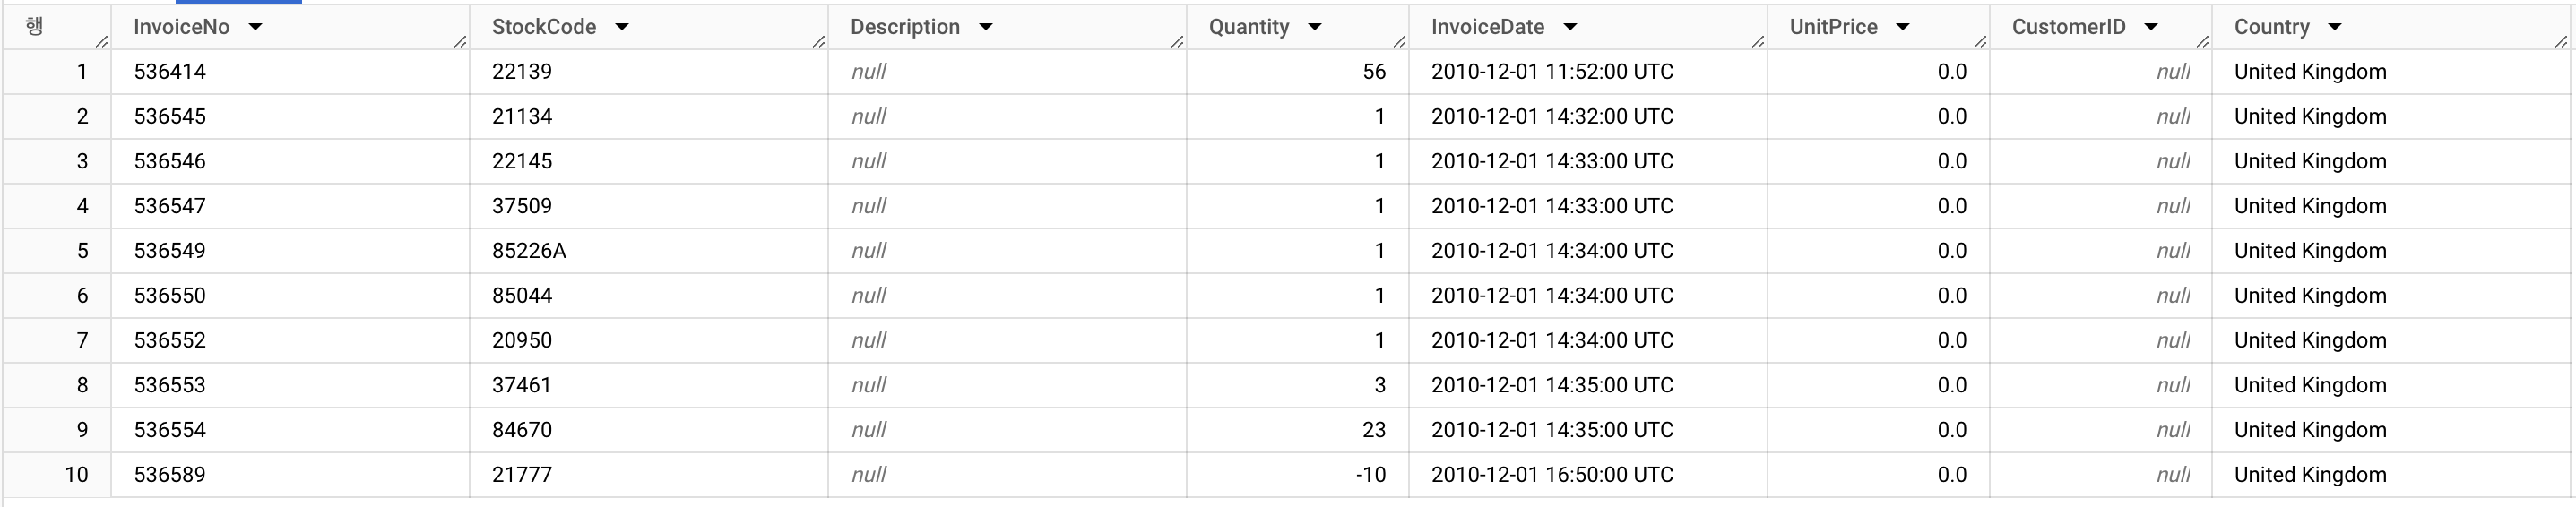

In [ ]:
SELECT COUNT(*) as total_rows
FROM aiffel-411000.modulabs_project.data

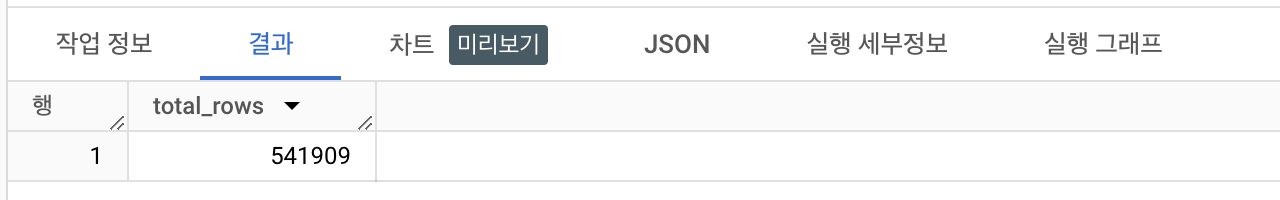

## 1. Data Processing

---

### 1.1 missing values

Case when을 사용하여 Null(결측치)만 1로 표시 <br/>
Union all을 사용하여 모든 Column을 결합

In [ ]:
# 결측치 비율 확인
SELECT COUNT(InvoiceNo) as COUNT_InvoiceNo, COUNT(StockCode) as COUNT_StockCode, COUNT(Description) as COUNT_Description, COUNT(Quantity) as COUNT_Quantity, COUNT(InvoiceDate) as COUNT_InvoiceDate, COUNT(UnitPrice) as COUNT_UnitPrice, COUNT(CustomerID) as COUNT_CustomerID, COUNT(Country) as COUNT_Country
FROM aiffel-411000.modulabs_project.data

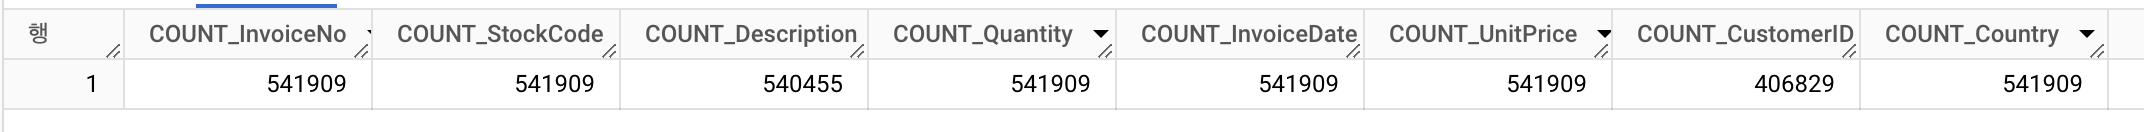

In [ ]:
select 
    'CustomerID' AS column_name,
    ROUND(SUM(CASE WHEN CustomerID IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
from aiffel-411000.modulabs_project.data
union all

select 
  'InvoiceNo' AS column_name,
    ROUND(SUM(CASE WHEN InvoiceNo IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
from aiffel-411000.modulabs_project.data
union all

select 
  'StockCode' AS column_name,
    ROUND(SUM(CASE WHEN StockCode IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
from aiffel-411000.modulabs_project.data
union all

select 
  'Description' AS column_name,
    ROUND(SUM(CASE WHEN Description IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
from aiffel-411000.modulabs_project.data
union all

select 
  'Quantity' AS column_name,
    ROUND(SUM(CASE WHEN Quantity IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
from aiffel-411000.modulabs_project.data
union all

select 
  'InvoiceDate' AS column_name,
    ROUND(SUM(CASE WHEN InvoiceDate IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
from aiffel-411000.modulabs_project.data
union all

select 
  'UnitPrice' AS column_name,
    ROUND(SUM(CASE WHEN UnitPrice IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
from aiffel-411000.modulabs_project.data
union all

select 
  'Country' AS column_name,
    ROUND(SUM(CASE WHEN Country IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage

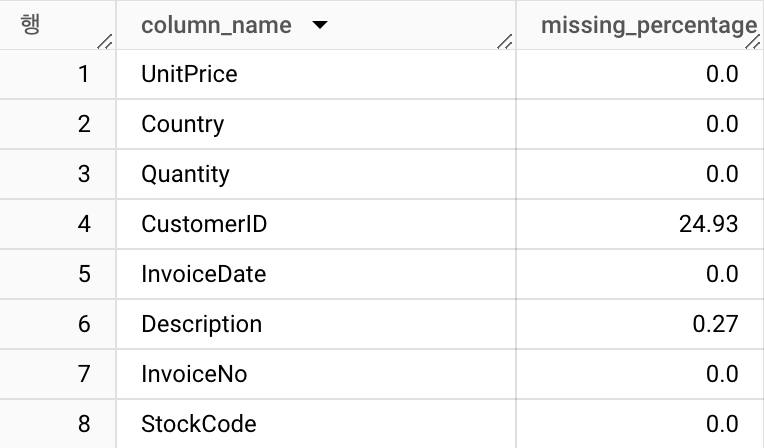


CustomerID : 24.93% <br/>
Description : 0.27% <br/> 결측치 확인

In [ ]:
delete
FROM
  aiffel-411000.modulabs_project.data
where 
  customerID is null
or
  Description is null

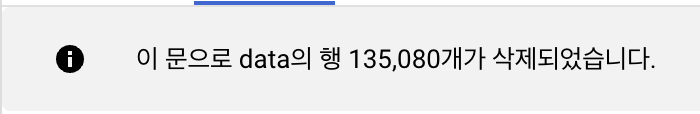

In [ ]:
select 
  StockCode , Description
from 
  aiffel-411000.modulabs_project.data
where 
  StockCode = '85123A'

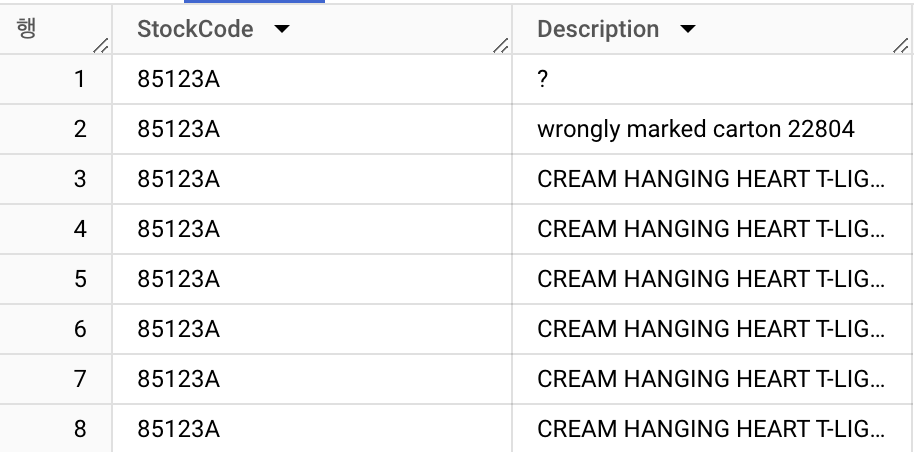

동일한 StockCode임에도 다른 Description 확인 <br/>
StockCode 기반 Description은 일관성 결여로 인해 분석에서 제외

### 1.2 Duplicated values

In [ ]:
SELECT *
FROM
  aiffel-411000.modulabs_project.data
group by InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, UnitPrice, CustomerID, Country 
having count(*) > 1

모든 Column을 그룹으로 묶어 동일한 중복 값 4837행 확인

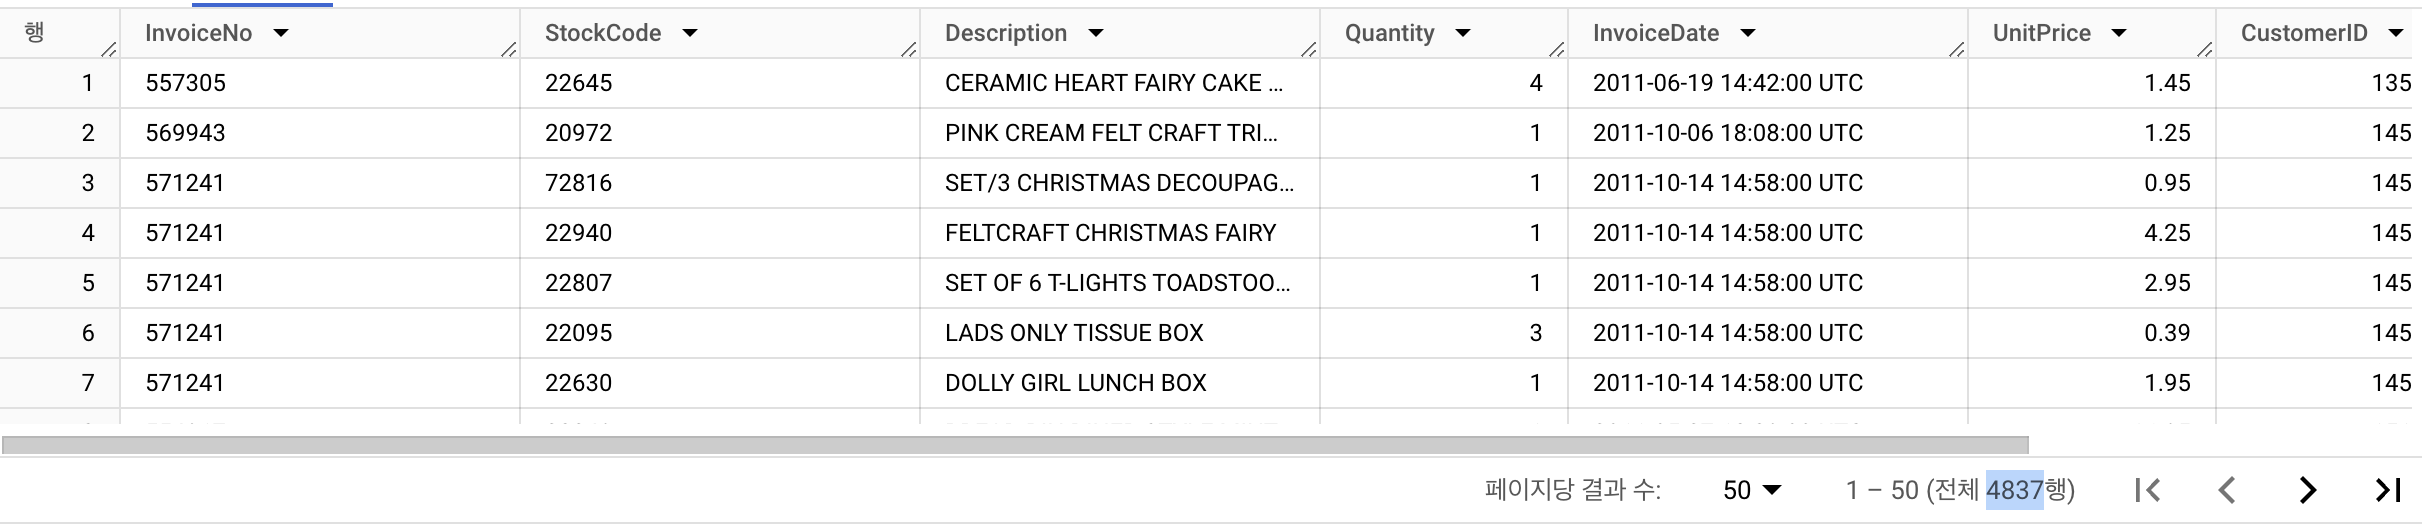

In [ ]:
CREATE OR REPLACE TABLE 
    `aiffel-411000.modulabs_project.data` as


SELECT 
    distinct *
from 
    `aiffel-411000.modulabs_project.data`

중복값 제거 후 총 401,604행 확인 
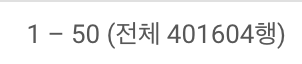

### 1.3 Canceled Values

In [ ]:
SELECT 
    distinct InvoiceNo
from 
    `aiffel-411000.modulabs_project.data`
limit 
    100

InvoiceNo를 확인하였을 때 C로 시작하는 값이 있는 것을 확인

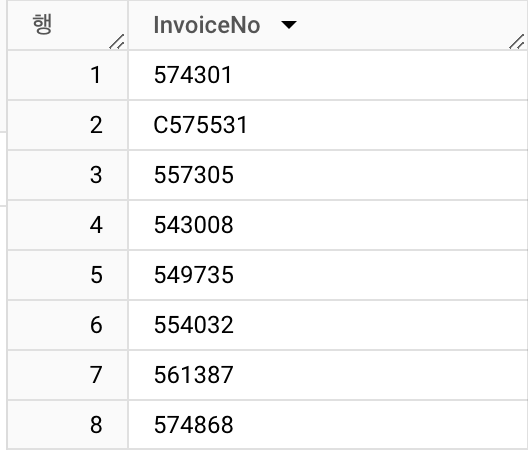

In [ ]:
SELECT distinct *
from `aiffel-411000.modulabs_project.data`
where InvoiceNo like "C%"
limit 100

C로 시작되는 값은 Quantity가 (-) 값을 가지고 있어 Cancel로 추측

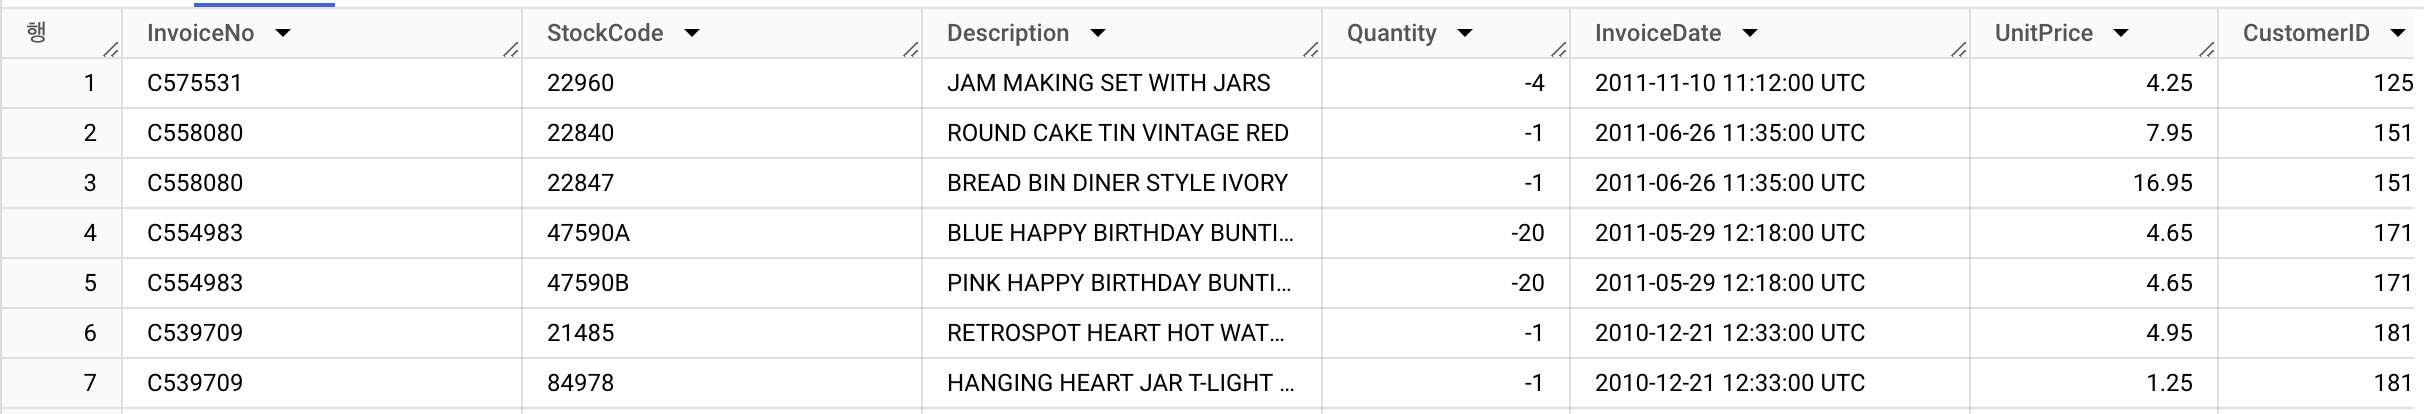

In [ ]:
SELECT 
    ROUND(SUM(CASE WHEN InvoiceNo like "C%" THEN 1 ELSE 0 END)/ count(*) * 100, 1) as C_rate
from 
`aiffel-411000.modulabs_project.data`   

전체 중 2.2% 비율로 확인, 추후 분석을 위해 값 보류

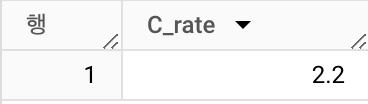

In [ ]:
SELECT 
    StockCode, count(*) as sell_cnt
from 
    `aiffel-411000.modulabs_project.data`
group by 
    StockCode
ORDER BY 
    sell_cnt DESC
limit 10

StockCode 중간 값 중 POST와 85123A, 85099B 같은 특이값 확인

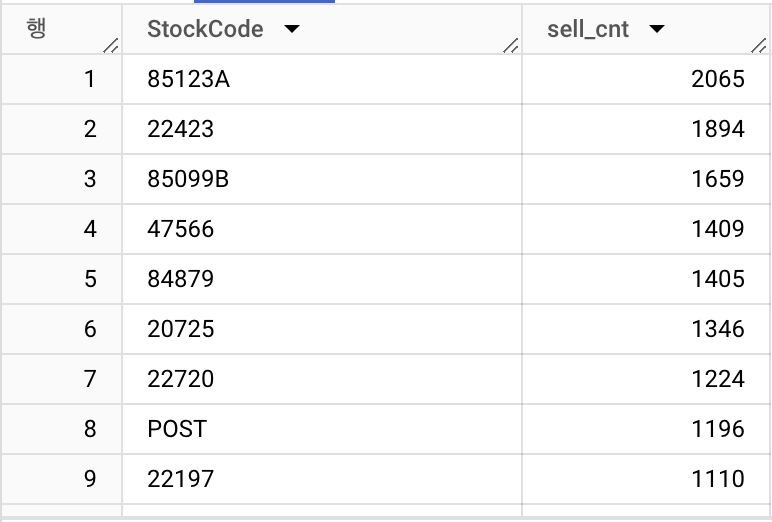

In [ ]:
SELECT DISTINCT StockCode, number_count
FROM (
  SELECT StockCode,
    LENGTH(StockCode) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]', '')) AS number_count
  FROM aiffel-411000.modulabs_project.data
) 
WHERE number_count = 0
or number_count = 1

특이값의 문자만 추출하여 유형 분석<br/>
제품 코드가 아닌 회사 내부용 값으로 추측
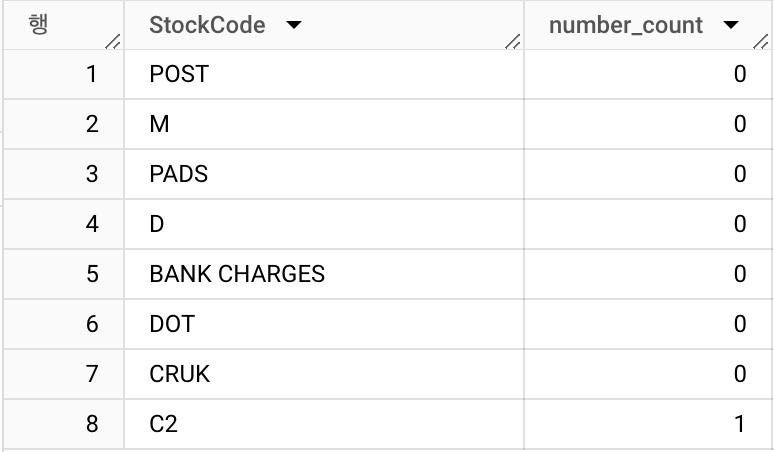

In [ ]:
delete
FROM aiffel-411000.modulabs_project.data
WHERE StockCode IN (
  SELECT DISTINCT StockCode
  FROM (SELECT StockCode,
    LENGTH(StockCode) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]', '')) AS number_count
  FROM aiffel-411000.modulabs_project.data
) 
WHERE number_count = 0
or number_count = 1)

고객 정보가 아니기 때문에 값 제거

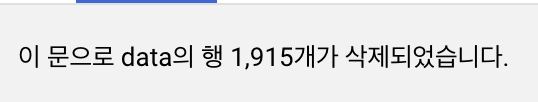

In [ ]:
SELECT DISTINCT Description
FROM aiffel-411000.modulabs_project.data
WHERE REGEXP_CONTAINS(Description, r'[a-z]');

Description 내 대문자, 소문자가 혼합 사용된 것으로 확인 

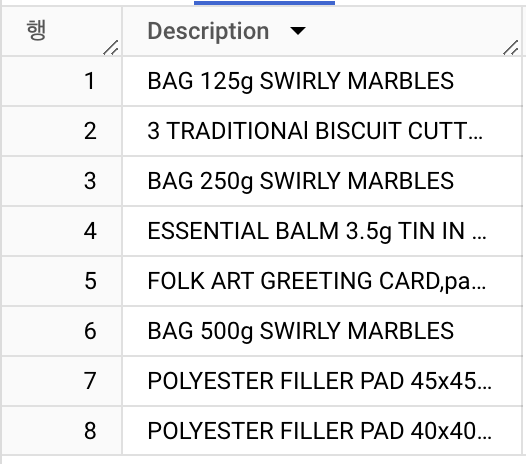

In [ ]:
DELETE
FROM aiffel-411000.modulabs_project.data
WHERE Description in ('Next Day Carriage', 'High Resolution Image')

'Next Day Carriage', 'High Resolution Image 는 제품 Description이 아님으로 행 제거
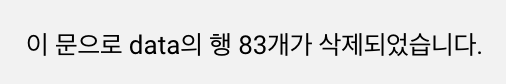

In [ ]:
CREATE OR REPLACE TABLE aiffel-411000.modulabs_project.data AS
 SELECT
  * EXCEPT (Description),
  upper(Description) as Description
FROM aiffel-411000.modulabs_project.data;

소문자를 대문자로 표준화
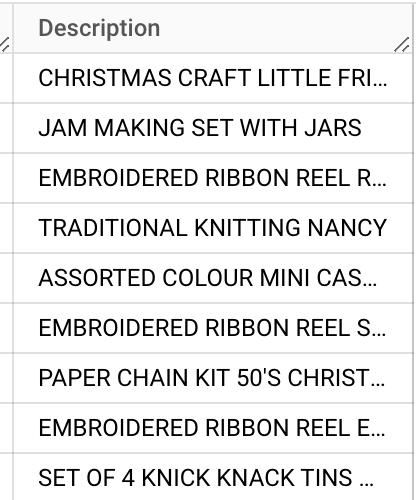

In [ ]:
 SELECT
  min(UnitPrice) AS min_price, max(UnitPrice) AS max_price, avg(UnitPrice) AS avg_price
FROM aiffel-411000.modulabs_project.data;

가격의 최대, 최소, 평균값 출력 <br/>

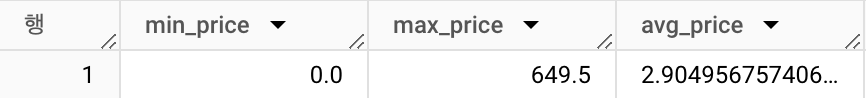

In [ ]:
CREATE OR REPLACE TABLE aiffel-411000.modulabs_project.data AS 
SELECT *
FROM aiffel-411000.modulabs_project.data
WHERE UnitPrice != 0

가격이 0원인 제품은 판매용이 아니거나 오류 값일 수 있어 제거
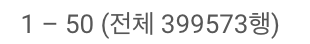

## 2. RFM

### 2.1 Recency

In [ ]:
CREATE OR REPLACE TABLE aiffel-411000.modulabs_project.user_r AS

SELECT
  CustomerID, 
  EXTRACT(DAY FROM MAX(InvoiceDay) OVER () - InvoiceDay) AS recency
FROM (
  SELECT 
    CustomerID,
    MAX(DATE(InvoiceDate)) AS InvoiceDay
  FROM aiffel-411000.modulabs_project.data
  GROUP BY CustomerID
);

과거 데이터임으로 최근 구매날짜를 기준 InvoiceDay 간의 차이를 계산<br/>
r = Recency 테이블 저장

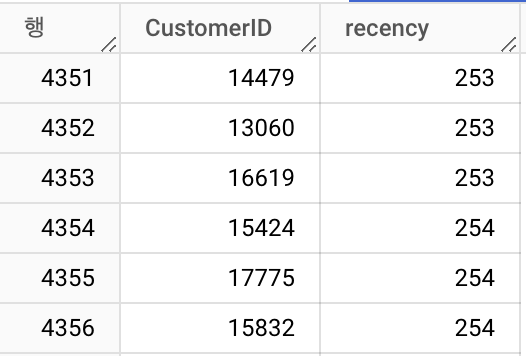

### 2.2 Frequency

In [ ]:
CREATE OR REPLACE TABLE aiffel-411000.modulabs_project.user_rf AS

-- (1) 전체 거래 건수 계산
WITH purchase_cnt AS ( 
  SELECT
  CustomerID,
  count(DISTINCT InvoiceNo) AS purchase_cnt
  FROM aiffel-411000.modulabs_project.data
group by CustomerID
),

-- (2) 구매한 아이템 총 수량 계산
item_cnt AS (
  SELECT
  CustomerID,
  sum(Quantity) AS item_cnt
  FROM aiffel-411000.modulabs_project.data
group by CustomerID
)

-- 기존의 user_r에 (1)과 (2)를 통합
SELECT
  pc.CustomerID,
  pc.purchase_cnt,
  ic.item_cnt,
  ur.recency
FROM purchase_cnt AS pc
JOIN item_cnt AS ic
  ON pc.CustomerID = ic.CustomerID
JOIN aiffel-411000.modulabs_project.user_r AS ur
  ON pc.CustomerID = ur.CustomerID;

전체 거래 건수(purchase_cnt)와 구매한 아이템의 총 수(item_cnt)를 계산 <br/>
rf 테이블에 저장

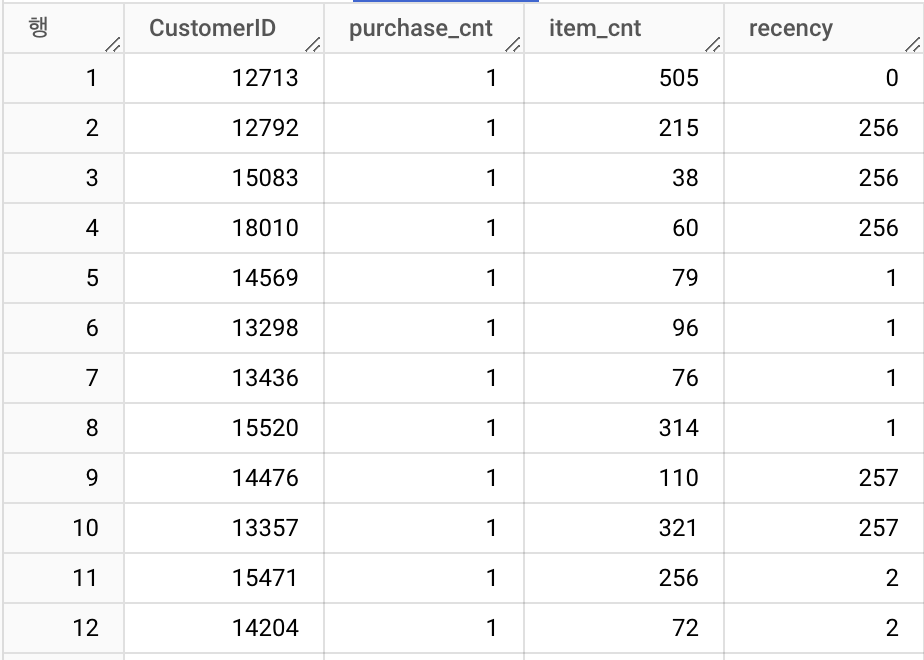

### 2.3 Monetary

In [ ]:
CREATE OR REPLACE TABLE aiffel-411000.modulabs_project.user_rfm AS   
SELECT
  rf.CustomerID AS CustomerID,
  rf.purchase_cnt,
  rf.item_cnt,
  rf.recency,
  ut.user_total,
  ut.user_total / rf.purchase_cnt AS user_average
FROM aiffel-411000.modulabs_project.user_rf rf
LEFT JOIN (
  -- 고객 별 총 지출액
  SELECT
    CustomerID,
  round(sum(Quantity * UnitPrice),1) as user_total
from
  aiffel-411000.modulabs_project.data
group by
  CustomerID
) ut
ON rf.CustomerID = ut.CustomerID;

Quantity * UnitPrice = user_total 값 저장
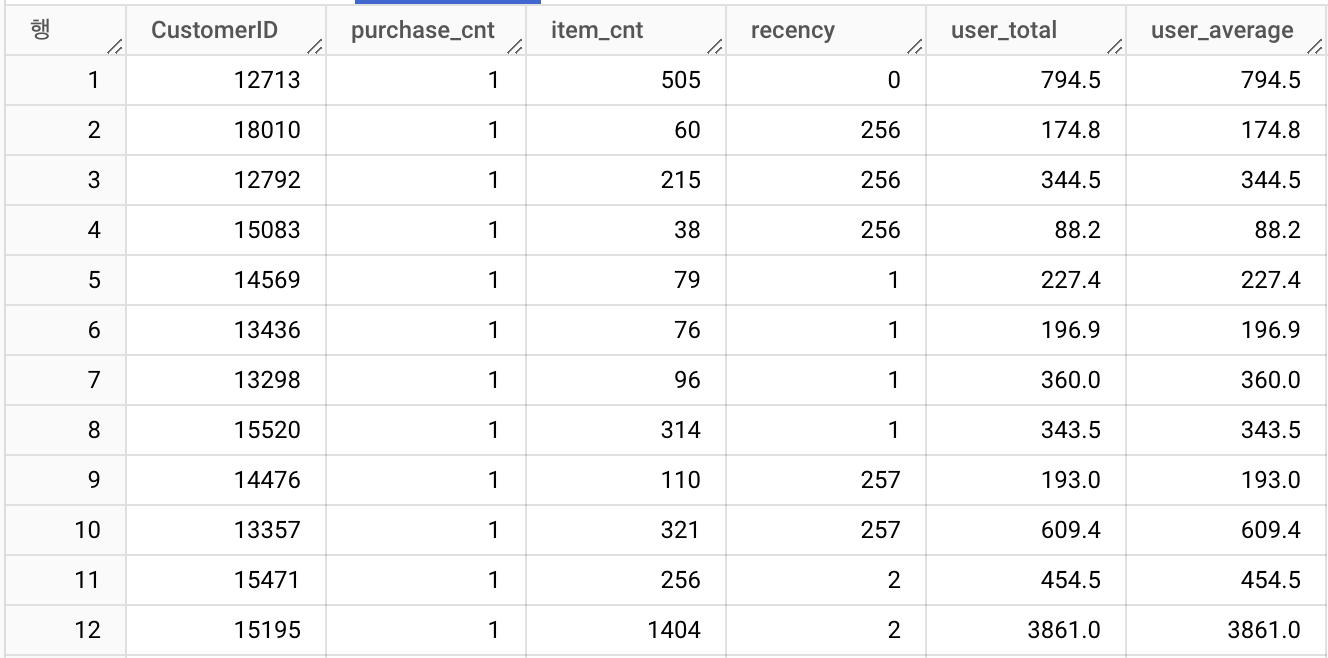

### 2.4 RFM Scroe

In [ ]:
WITH ranked_customers AS (
    SELECT
        CustomerID,
        recency,
        purchase_cnt,
        user_total,
        NTILE(5) OVER (ORDER BY recency ASC) AS R,  -- recency는 작은 값이 더 좋은 값
        NTILE(5) OVER (ORDER BY purchase_cnt DESC) AS F, -- F와 M은 큰 값이 더 좋은 값
        NTILE(5) OVER (ORDER BY user_total DESC) AS M
    FROM
        aiffel-411000.modulabs_project.user_rfm
)
SELECT *, (R + F + M) as RFMScore
FROM ranked_customers
ORDER BY CustomerID;


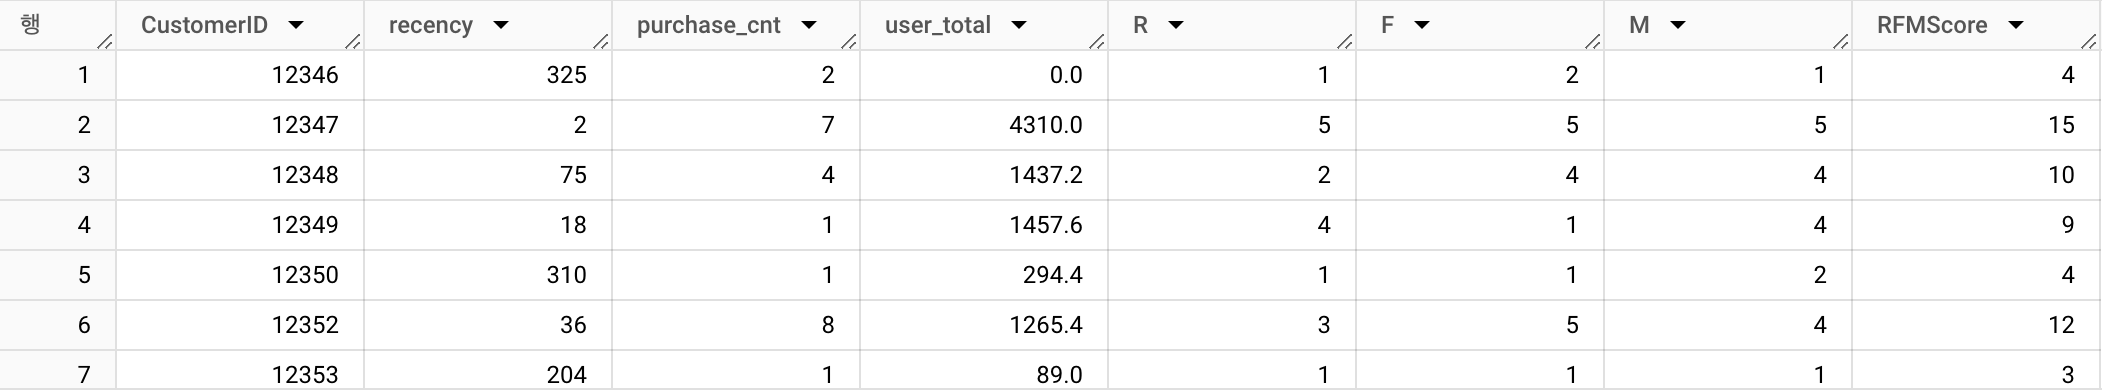

In [ ]:
WITH ranked_customers AS (
    SELECT
        CustomerID,
        recency,
        purchase_cnt,  -- F에는 구매 건수로만 사용
        user_total,
        NTILE(5) OVER (ORDER BY recency ASC) AS R,  -- recency는 작은 값이 더 좋은 값이므로 오름차순 정렬
        NTILE(5) OVER (ORDER BY purchase_cnt DESC) AS F,  -- 구매 건수는 클수록 좋은 값이므로 내림차순 정렬
        NTILE(5) OVER (ORDER BY user_total DESC) AS M  -- 총 구매액도 클수록 좋은 값이므로 내림차순 정렬
    FROM
        aiffel-411000.modulabs_project.user_rfm AS u
)
SELECT 
    R, 
    F, 
    M, 
    (R + F + M) AS RFMScore, 
    COUNT(*) AS count  -- RFM 점수를 기준으로 그룹화된 각 그룹의 고객 수를 계산
FROM 
    ranked_customers 
GROUP BY 
    R, F, M, RFMScore  -- R, F, M, RFMScore별로 그룹화
ORDER BY 
    count DESC;  -- 고객 수를 기준으로 내림차순 정렬

점수 별 그룹화했을 때 <br/>
15점이 352명으로 가장 높은 것으로 확인 <br/>
<br/>
생각보다 RFM 점수가 높은 유저들이 많아 이 이커머스에는 어떤 요인이 긍정적으로 작용하는지 요소들이 궁금해졌다.

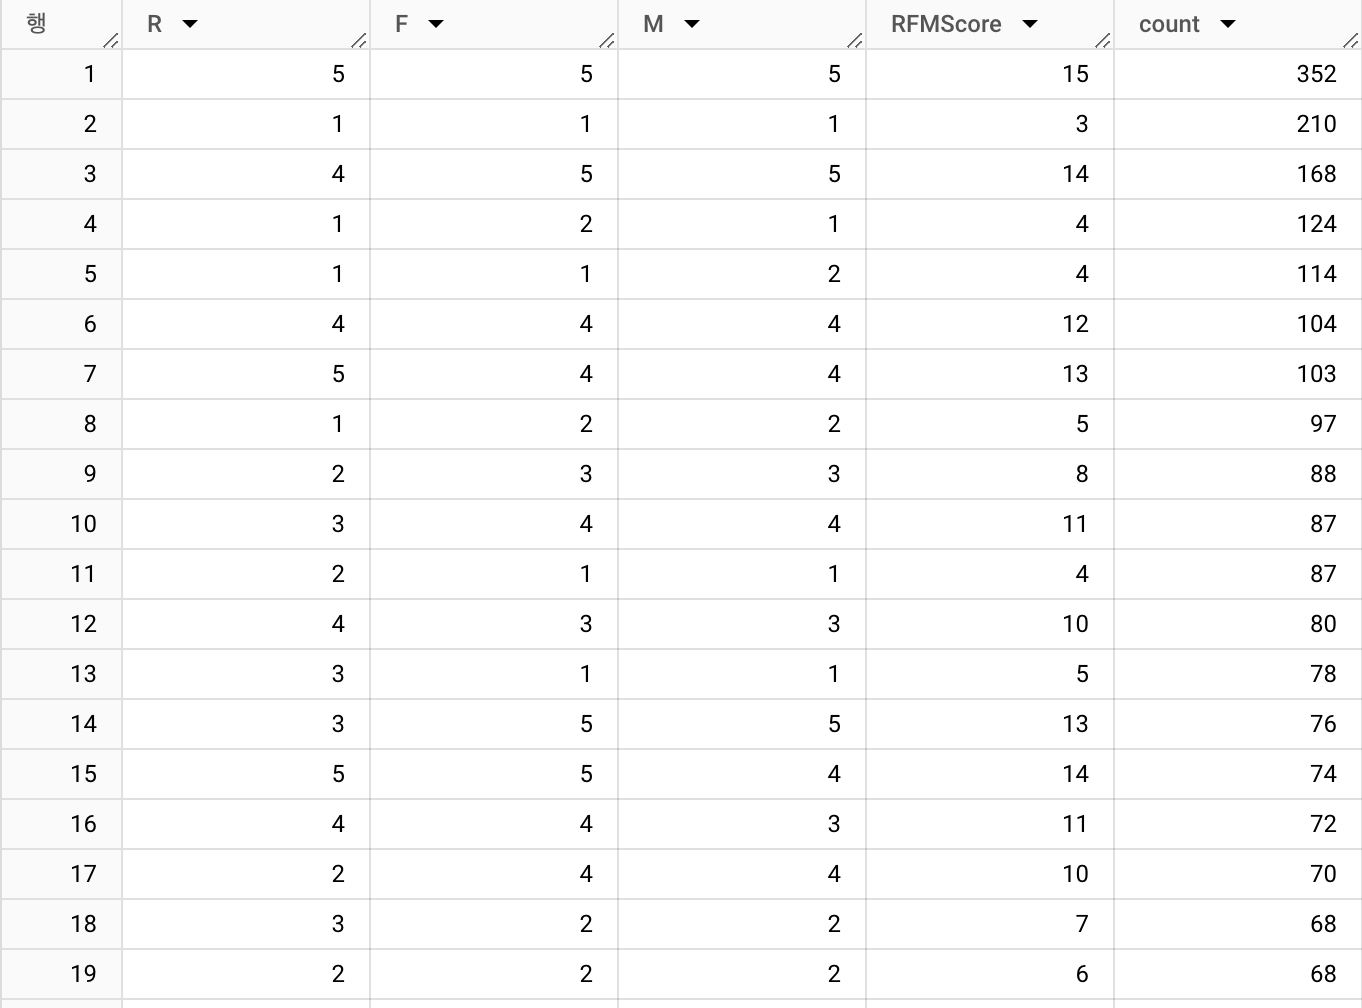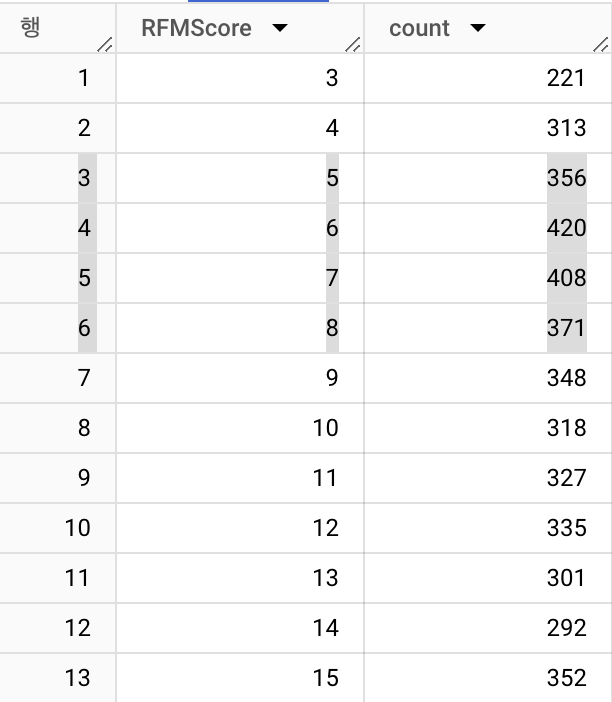

### 3. Feature Extraction

### 3.1 구매 제품의 다양성

In [ ]:
CREATE OR REPLACE TABLE aiffel-411000.modulabs_project.user_data AS  

WITH unique_products AS (
  SELECT
    CustomerID,
    COUNT(DISTINCT StockCode) AS unique_products
  FROM aiffel-411000.modulabs_project.data
  GROUP BY CustomerID
)
SELECT ur.*, up.* EXCEPT (CustomerID)
FROM aiffel-411000.modulabs_project.user_rfm AS ur
JOIN unique_products AS up
ON ur.CustomerID = up.CustomerID;

고객 별로 구매한 상품들의 고유한 수 = unique_products 로 데이터 추가

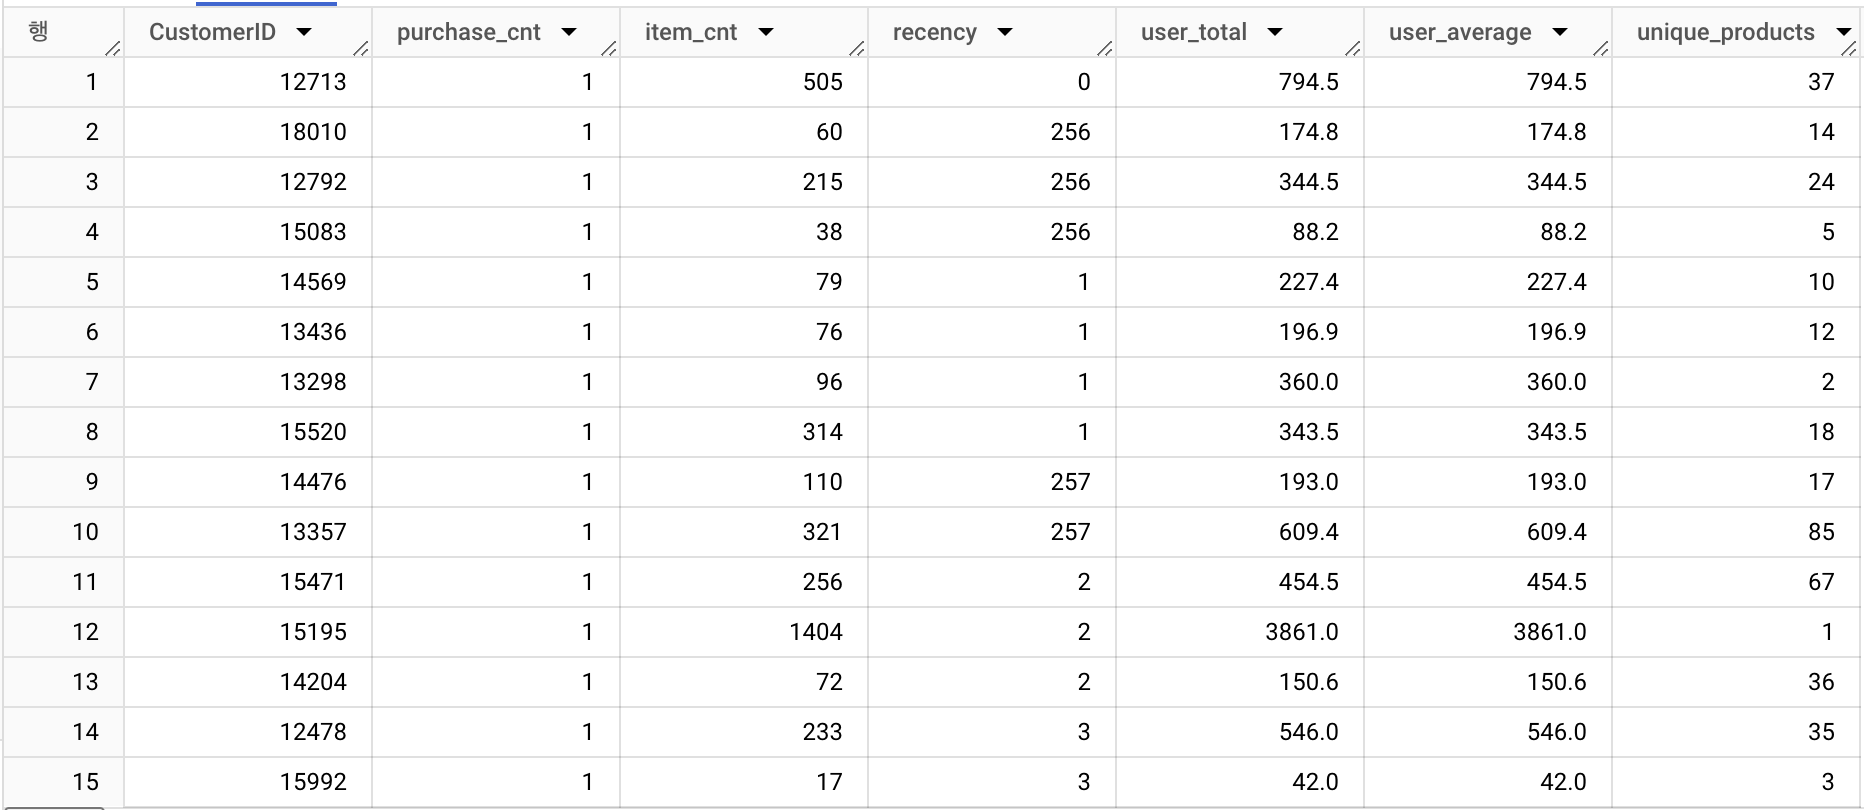

### 3.2 평균 구매 주기

In [ ]:
CREATE OR REPLACE TABLE project_name.modulabs_project.user_data AS 
WITH purchase_intervals AS (
  -- (2) 고객 별 구매와 구매 사이의 평균 소요 일수
  SELECT
    CustomerID,
    CASE WHEN ROUND(AVG(interval_), 2) IS NULL THEN 0 ELSE ROUND(AVG(interval_), 2) END AS average_interval
  FROM (
    -- (1) 구매와 구매 사이에 소요된 일수
    SELECT
      CustomerID,
      DATE_DIFF(InvoiceDate, LAG(InvoiceDate) OVER (PARTITION BY CustomerID ORDER BY InvoiceDate), DAY) AS interval_
    FROM
      aiffel-411000.modulabs_project.data
    WHERE CustomerID IS NOT NULL
  )
  GROUP BY CustomerID
)

SELECT u.*, pi.* EXCEPT (CustomerID)
FROM aiffel-411000.modulabs_project.user_data AS u
LEFT JOIN purchase_intervals AS pi
ON u.CustomerID = pi.CustomerID;

구매 사이의 평균 소요 일수 = average_interval로 데이터 추가
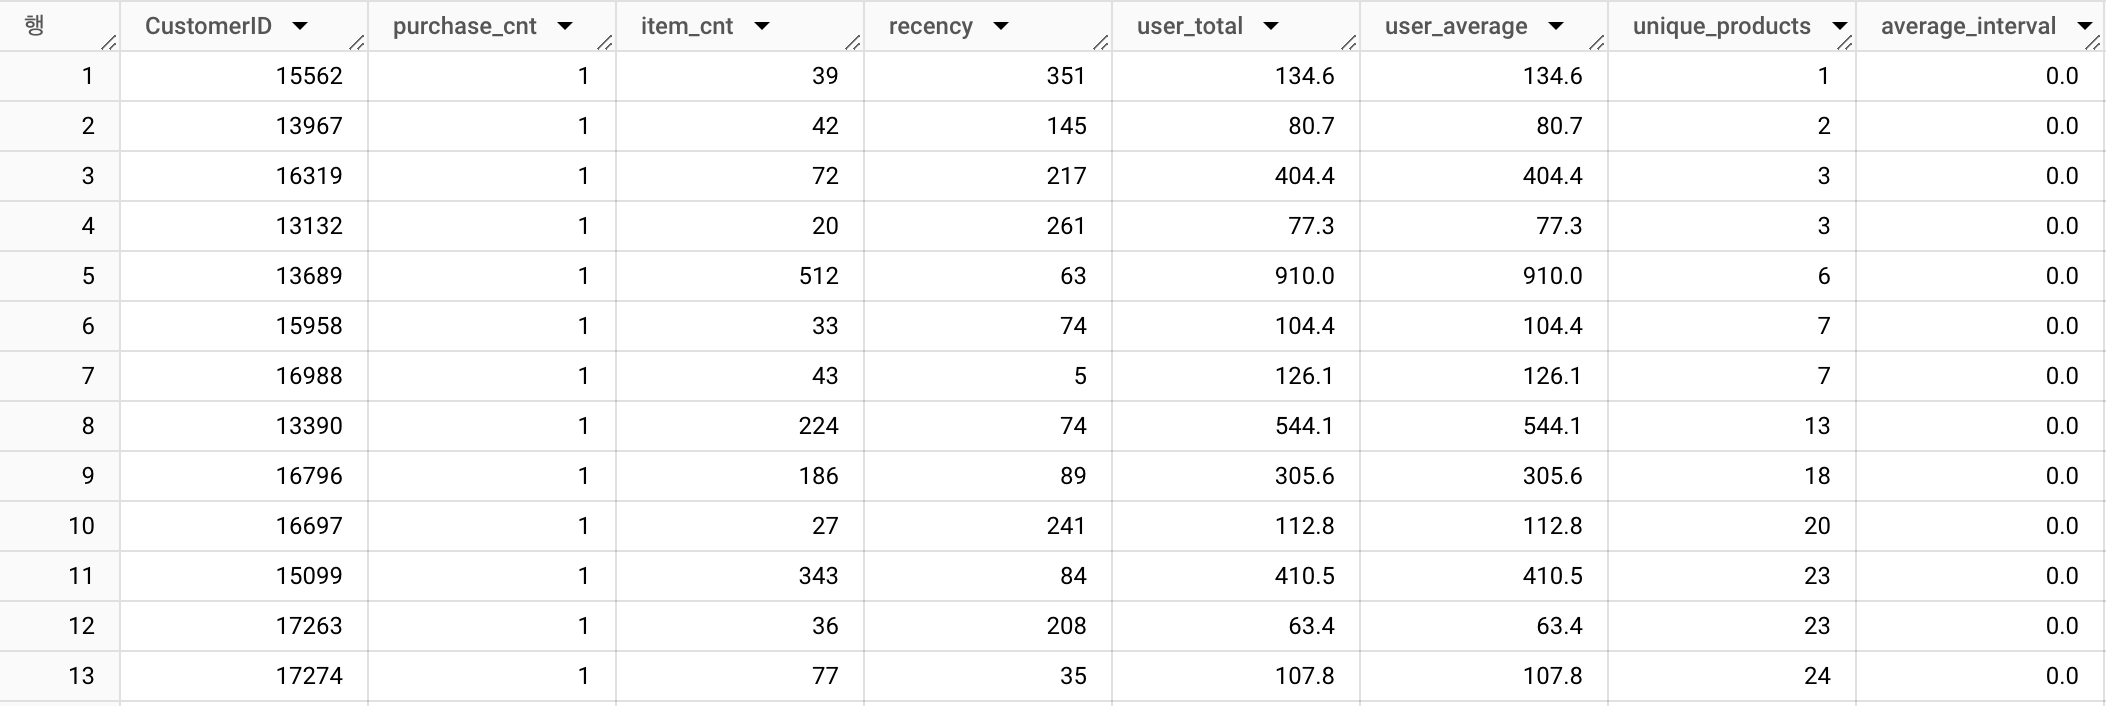

### 3.3 구매 취소 경향성

3.3.1 취소 빈도(cancel_frequency)

고객 별로 취소한 거래의 총 횟수(InvoiceNo에 c가 있는 거래건 수) = cancel_frequency 로 저장


3.3.2 취소 비율(cancel_rate)
총 거래 수 대비 취소 건수의 비율 = cancel_rate 로 저장


In [ ]:
CREATE OR REPLACE TABLE aiffel-411000.modulabs_project.user_data AS

WITH TransactionInfo AS (
  SELECT
    CustomerID,
    count(DISTINCT InvoiceNo) AS total_transactions,
    count(CASE WHEN InvoiceNo like 'C%' then InvoiceNo END) AS cancel_frequency
  FROM aiffel-411000.modulabs_project.data
  GROUP BY CustomerID
)

SELECT u.*, t.* EXCEPT(CustomerID), cancel_frequency / total_transactions * 100 AS cancel_rate
FROM `aiffel-411000.modulabs_project.user_data` AS u
LEFT JOIN TransactionInfo AS t
ON u.CustomerID = t.CustomerID

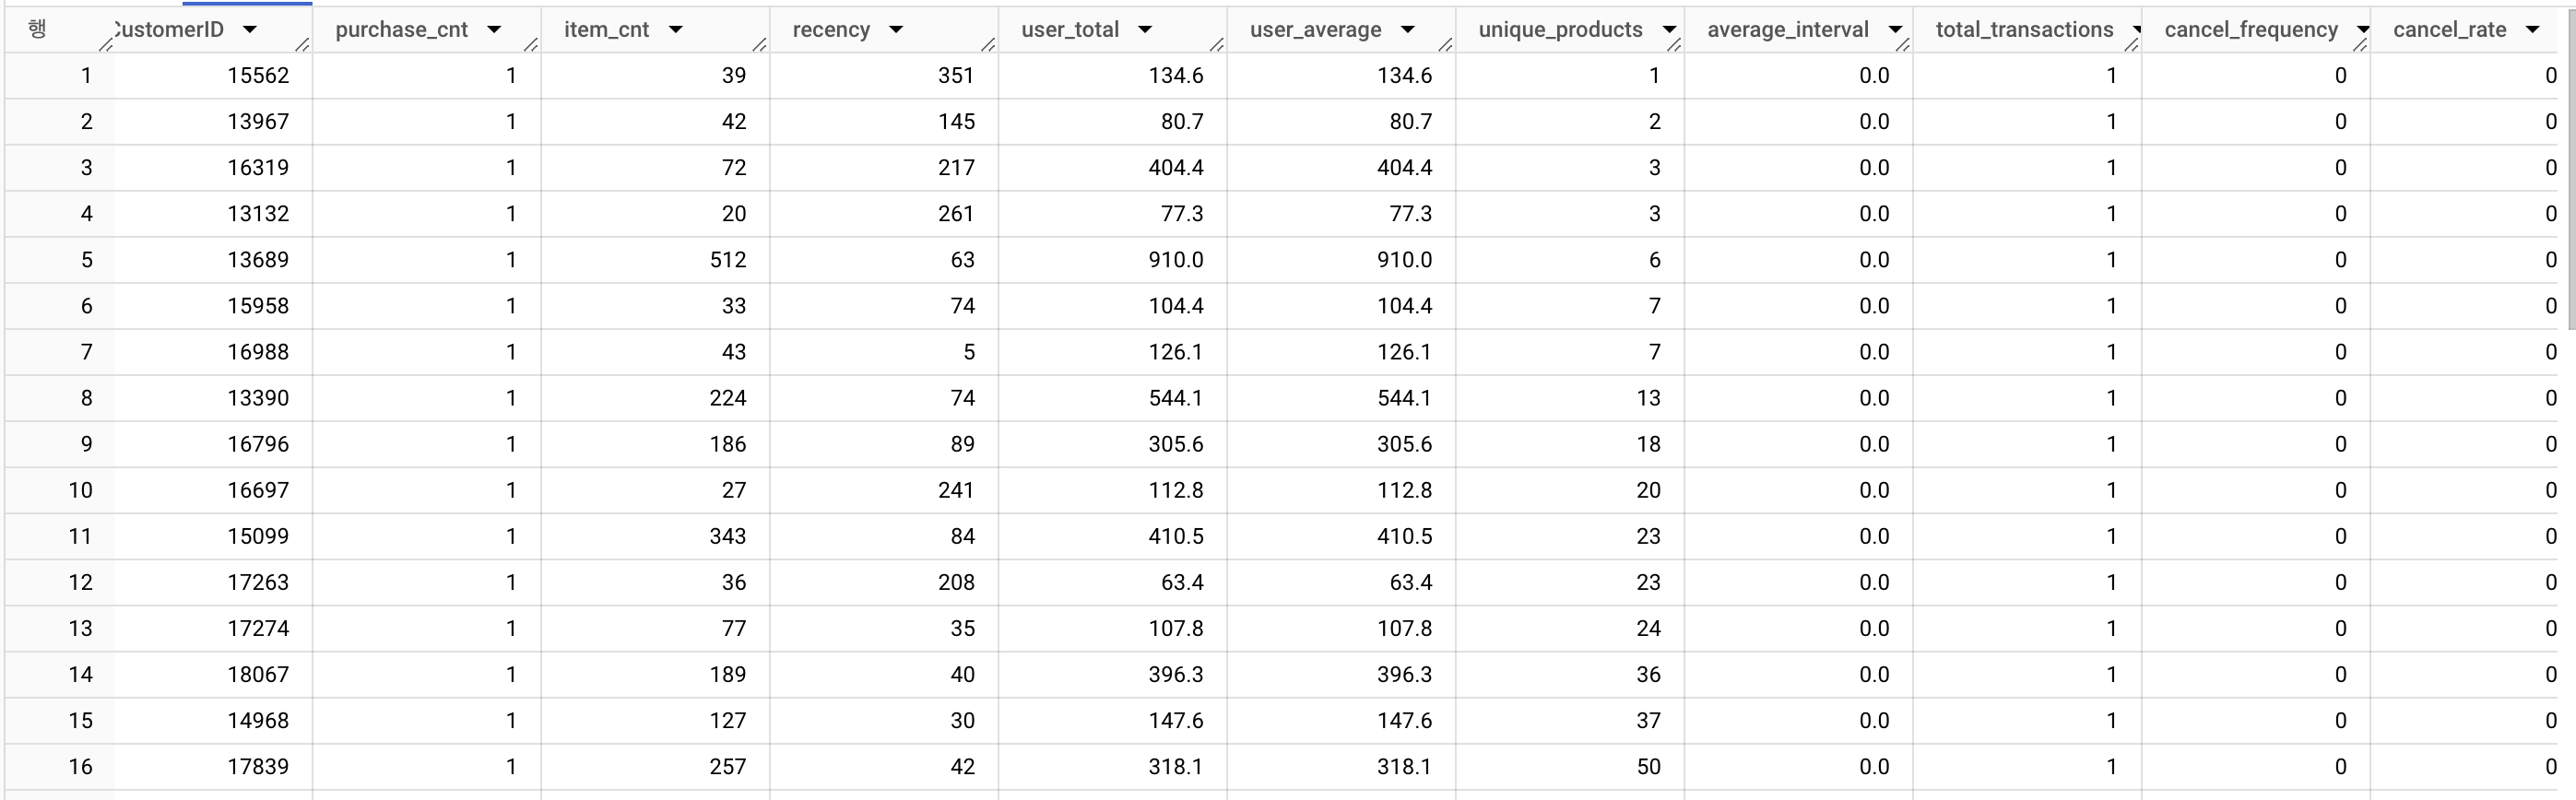

# Retrospective

RFM 분석 후반부 중 실수로 잘못된 데이터 값이 Replaced 되며 원본 데이터를 수정할 때는 꼭 신중해야한다는 것을 배웠다.

좋은 결과물을 만드는 것 보다는 과정에 집중하여 최대한 내용을 이해하기 위해 노력하였고<br/>
처음에는 낮설게 느껴졌던 SQL이 조금씩 익숙해져 이전 직장에서 이러한 부분을 공부했었다면 고객데이터를 활용하여 더 좋은 인사이트를 만들 수 있었겠다는 생각이 들었다.